In [3]:
#import necessary libraries
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [4]:
# Load the penguins dataset from seaborn
df = sns.load_dataset("penguins")

In [12]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [26]:
#dropping the null values
df=df.dropna()

In [44]:
df=df.dropna()

In [48]:
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# selecting features to use for clustering
features = ['bill_length_mm', 'body_mass_g']

# Extract numerical features
X = df[features]



In [50]:
# Perform the elbow method to find the optimal number of clusters (k)
k_values = range(1, 11)
inertia_values = []


In [51]:
# Try different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)


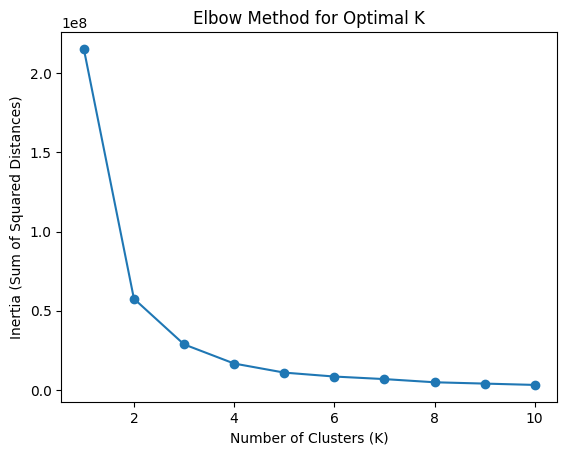

In [52]:
# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()


In [53]:
# Apply k-means clustering
# Choose the number of clusters based on graph
k_value = 3  
kmeans = KMeans(n_clusters=k_value, random_state=42)
# Fit the model to the data
df['Cluster'] = kmeans.fit_predict(X)

In [54]:
# Get the centroid values of the clusters
centroids = kmeans.cluster_centers_
print("Centroid Values:")
print(centroids)

Centroid Values:
[[  41.12214286 3461.25      ]
 [  48.6625     5365.9375    ]
 [  44.24336283 4310.61946903]]


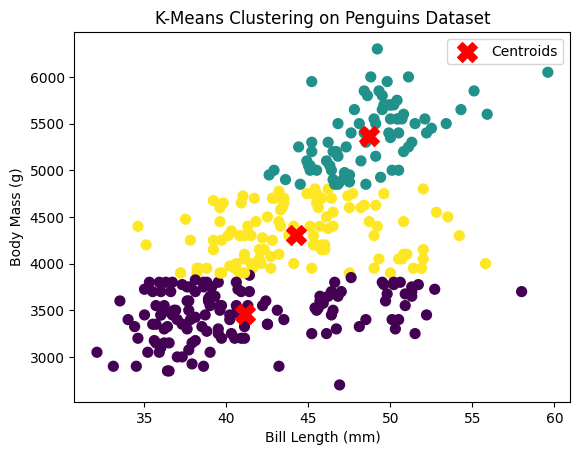

In [55]:

# Visualize the clusters
plt.scatter(df['bill_length_mm'], df['body_mass_g'], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering on Penguins Dataset')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.show()
